# Cafe Sale Cleaning Project
This project analyzes a cafe sales dataset containing synthetic sales transaction data from a cafe. The key objective is to clean and preprocess the data, then analyze and visualize the quantity of each item sold. (In this notebook, I analyze and visualize sales data to gain insights into customer purchasing behavior. The dataset includes information about different items sold, quantities, prices, transaction dates, and payment methods.)

**Goals of this project:**

* Clean and standardize raw sales data by handling missing or erroneous values.
* Impute missing values using logical estimates derived from existing data for improved accuracy.
* Visualize the distribution of quantities sold across different product categories.

The dataset was obtained from Kaggle, available at: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We begin by loading the dataset from a CSV file and then display the first 10 rows to get an initial look at the data.

In [2]:
df= pd.read_csv('../data/dirty_cafe.csv')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


To get a quick overview of the dataset, we use df.info(). This provides essential information about the dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


To explore all the unique values in the Item column.

In [4]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

We clean the Item column by replacing inconsistent entries with proper missing values (NaN), and then filling them with a unified lable 'Unknown'.

In [5]:
df['Item'] = df['Item'].replace (['UNKNOWN', 'ERROR','nan'], np.nan)
df['Item'] = df['Item'].fillna('Unknown')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


To explore all the unique values in the Quantity column.

In [6]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

To get a quick overview of the dataset and to check if there are any Non-Null values in Columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              10000 non-null  object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


We replace the inconsistent entries with proper missing values (NaN), and then convert each column to numeric. Any values that can't be converted will also become NaN. We use the mathematical relationships to fill in the missing values where possible.

In [8]:
cols = ['Quantity','Price Per Unit','Total Spent']

for col  in cols:
    df[col]= df[col].replace(['UNKNOWN','ERROR','NaN'], np.nan)
for col in cols:
    df[col]= pd.to_numeric(df[col], errors='coerce')

#Quantity
mask = df['Quantity'].isna()
df.loc[mask, 'Quantity'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Price Per Unit']

#Price Per Unit
mask = df['Price Per Unit'].isna()
df.loc[mask, 'Price Per Unit'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Quantity']

#Total Spent
mask = df['Total Spent'].isna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Price Per Unit'] * df.loc[mask, 'Quantity']

df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


We create a dictionary called Item_Prices that maps each unique item to its corresponding unit price.

In [9]:
Item_Prices = (
    df[['Item', 'Price Per Unit']]
    .dropna()
    .drop_duplicates()
    .set_index('Item')
    .squeeze()
    .to_dict())
Item_Prices

{'Coffee': 2.0,
 'Cake': 3.0,
 'Cookie': 1.0,
 'Salad': 5.0,
 'Smoothie': 4.0,
 'Unknown': 4.0,
 'Sandwich': 4.0,
 'Juice': 3.0,
 'Tea': 1.5}

We identify rows where **two or more values are missing** among the key numerical columns: 'Quantity', 'Price Per Unit', and 'Total Spent'.

In [10]:
cols = ['Quantity', 'Price Per Unit', 'Total Spent']

rows_with_2_or_more_nans = df[df[cols].isna().sum(axis=1) >= 2]

rows_with_2_or_more_nans

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
629,TXN_9289174,Cake,NaN,NaN,12.0,Digital Wallet,In-store,2023-12-30
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
912,TXN_1575608,Sandwich,NaN,NaN,20.0,ERROR,Takeaway,2023-01-05
1008,TXN_7225428,Tea,NaN,NaN,3.0,Credit Card,Takeaway,2023-03-07
1436,TXN_7590801,Tea,NaN,NaN,6.0,Cash,Takeaway,ERROR
1482,TXN_3593060,Smoothie,NaN,NaN,16.0,Cash,NaN,2023-03-05


We fill in missing values in the 'Price Per Unit' column based on the item name. These values are likely derived from known standard prices for each item.

In [11]:
df.loc[(df['Item'] == 'Sandwich') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4.0
df.loc[(df['Item'] == 'Coffee') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 2.0
df.loc[(df['Item'] == 'Cake') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 3.0
df.loc[(df['Item'] == 'Cookie') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 1.0
df.loc[(df['Item'] == 'Salad') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 5.0
df.loc[(df['Item'] == 'Smoothie') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 4.0
df.loc[(df['Item'] == 'Juice') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 3.0
df.loc[(df['Item'] == 'Tea') & (df['Price Per Unit'].isna()), 'Price Per Unit'] = 1.5

df.head()



,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


we recheck the dataset to identify any rows that **still have two or more missing values** in the key numeric columns.

In [12]:
cols = ['Quantity', 'Price Per Unit', 'Total Spent']

rows_with_2_or_more_nans = df[df[cols].isna().sum(axis=1) >= 2]

rows_with_2_or_more_nans

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1761,TXN_3611851,Unknown,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2289,TXN_7524977,Unknown,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25


We remove any rows where the Item is labeled as 'Unknown', since these entries are too ambiguous to be useful for analysis.

In [13]:
df = df[~df['Item'].isin(['Unknown'])]
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


To ensure our data is now clean and usable, we perform one last check for rows that still have **two or more missing values** in the key numerical columns.

In [14]:
cols = ['Quantity', 'Price Per Unit', 'Total Spent']

rows_with_2_or_more_nans = df[df[cols].isna().sum(axis=1) >= 2]

rows_with_2_or_more_nans

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25
4257,TXN_6470865,Coffee,NaN,2.0,NaN,Digital Wallet,Takeaway,2023-09-18
5841,TXN_5884081,Cookie,NaN,1.0,NaN,Digital Wallet,In-store,2023-07-05


We fill in missing values in the Quantity column by using the **median quantity for each item**. Median improves data completeness while minimizing bias introduced by missing values.

In [15]:
df['Quantity'] = df.groupby('Item')['Quantity'].transform(
    lambda x: x.fillna(x.median())
)
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


Now we identify rows that have **exactly one missing value** among the key numeric columns: 'Quantity', 'Price Per Unit', and 'Total Spent'.

In [16]:
cols = ['Quantity', 'Price Per Unit', 'Total Spent']

rows_with_1_nan = df[df[cols].isna().sum(axis=1) == 1]

rows_with_1_nan

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
65,TXN_4987129,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
236,TXN_8562645,Salad,3.0,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,3.0,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,3.0,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,3.0,4.0,NaN,NaN,Takeaway,2023-05-14
1674,TXN_9367492,Tea,2.0,1.5,NaN,Cash,In-store,2023-06-19
2229,TXN_8498613,Sandwich,2.0,4.0,NaN,NaN,NaN,2023-11-08
2585,TXN_1259340,Tea,3.0,1.5,NaN,Digital Wallet,NaN,2023-02-24
2796,TXN_9188692,Cake,3.0,3.0,NaN,Credit Card,NaN,2023-12-01
3162,TXN_3577949,Cake,3.0,3.0,NaN,ERROR,Takeaway,2023-04-25


We fill in missing values in the Total Spent column by calculating (Total Spent = Quantity * Price Per Unit). This is done only for rows where Total Spent is missing and both Quantity and Price Per Unit are available.


In [17]:
mask = df['Total Spent'].isna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']

df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


To conduct a final check of all the unique values in the Quantity column.

In [18]:
df['Quantity'].unique()

array([2., 4., 5., 3., 1.])

In [19]:
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5])

In [20]:
df['Total Spent'].unique()

array([ 4. , 12. , 10. , 20. , 16. , 25. ,  8. ,  5. , 15. ,  6. ,  3. ,
        2. ,  9. ,  1. ,  7.5,  4.5,  1.5])

In [21]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich',
       'Juice', 'Tea'], dtype=object)

Now we explore all the unique values in the Payment Method column.

In [22]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', nan, 'ERROR'],
      dtype=object)

This time, we replace invalid entries like 'UNKNOWN', 'ERROR', and 'nan' with actual (NaN) values first, then fill those missing values with the unified label 'Unknown'.

In [24]:
df['Payment Method'] = df['Payment Method'].replace (['UNKNOWN', 'ERROR','nan'], np.nan)
df['Payment Method'] = df['Payment Method'].fillna('Unknown')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,UNKNOWN,2023-10-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Unknown,In-store,2023-12-31
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
11,TXN_3051279,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,ERROR


To explore all the unique values in the Payment Method column.

In [25]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'Unknown', 'Digital Wallet'], dtype=object)

To get a quick overview of the dataset and to check if there are any Non-Null values in Columns.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9031 non-null   object 
 1   Item              9031 non-null   object 
 2   Quantity          9031 non-null   float64
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9031 non-null   float64
 5   Payment Method    9031 non-null   object 
 6   Location          6086 non-null   object 
 7   Transaction Date  8888 non-null   object 
dtypes: float64(3), object(5)
memory usage: 635.0+ KB


We convert the Transaction Date column to proper datetime objects using pd.to_datetime. 

In [27]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


We check all the unique values in the Transaction Date column.

In [28]:
df['Transaction Date'].unique()

<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-28 00:00:00', '2023-12-31 00:00:00', '2023-11-07 00:00:00',
                 'NaT',
 ...
 '2023-10-06 00:00:00', '2023-11-11 00:00:00', '2023-06-07 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:00:00', '2023-03-27 00:00:00',
 '2023-07-03 00:00:00']
Length: 366, dtype: datetime64[ns]

In this step, we replace invalid entries like 'UNKNOWN', 'ERROR', and 'nan' with actual (NaN) values first, then fill those missing values with the unified label 'Unknown'.

In [29]:
df['Location'] = df['Location'].replace (['UNKNOWN', 'ERROR','nan'], np.nan)
df['Location'] = df['Location'].fillna('Unknown')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Unknown,2023-03-31
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,Unknown,2023-10-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,Unknown,In-store,2023-12-31
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
11,TXN_3051279,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,NaT


We aggregate the total quantity sold for each item and create a bar chart to visualize the sales distribution.

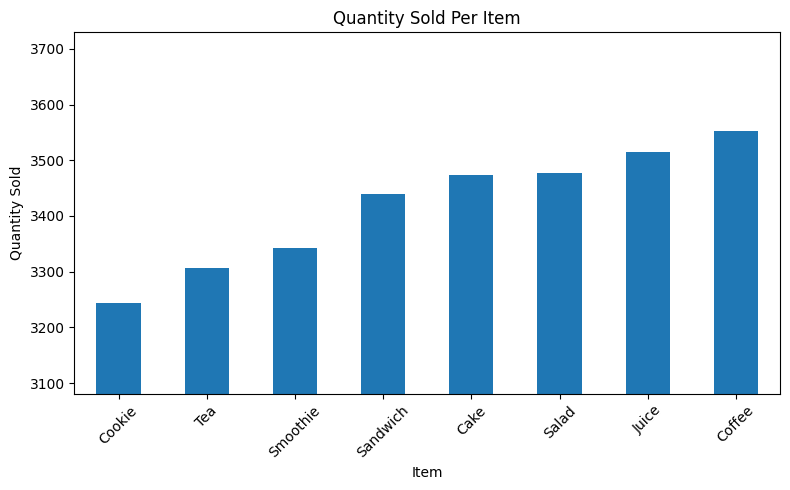

In [32]:
item_totals = df.groupby('Item')['Quantity'].sum().sort_values()

ax = item_totals.plot(kind='bar', figsize=(8,5))
plt.ylim(item_totals.min() * 0.95, item_totals.max() * 1.05)
plt.xlabel('Item')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Per Item')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()